# Intro to Data Wrangling and Tidy Data
*Author*: Zach del Rosario


### Learning outcomes
By working through this notebook, you will be able to:

- Understand basic principles of working with data in software
- State the basic ideas of tidy data
- State the basic ideas of data wrangling 


## Setup

In this day exercise, we'll make use of the Pandas and Grama packages to work with data. [Pandas](https://pandas.pydata.org/) is a package for data analysis, and it supplies the DataFrame object for representing data. [Grama](https://github.com/zdelrosario/py_grama) builds on top of Pandas to provide pipeline-based tools for data and machine learning.

This notebook focuses on introducing *ideas*, the evening notebook will teach you the *mechanics* of how to use these tools.


In [1]:
import numpy as np
import pandas as pd
import grama as gr

DF = gr.Intention()

# For downloading data
import os
import requests


The following code downloads the same data you extracted in the previous day's Tabula exercise.


In [2]:
# Filename for local data
filename_data = "./data/tabula-weibull.csv"

# The following code downloads the data, or (after downloaded)
# loads the data from a cached CSV on your machine
if not os.path.exists(filename_data):
    # Make request for data
    url_data = "https://raw.githubusercontent.com/zdelrosario/mi101/main/mi101/data/tabula-weibull1939-table4.csv"
    r = requests.get(url_data, allow_redirects=True)
    open(filename_data, 'wb').write(r.content)
    print("   Tabula-extracted data downloaded from public Google sheet")
else:
    # Note data already exists
    print("   Tabula-extracted data loaded locally")
    
# Read the data into memory
df_tabula = pd.read_csv(filename_data)


   Tabula-extracted data downloaded from public Google sheet


These are data on the tensile strength of specimens of stearic acid and plaster-of-paris.


In [3]:
df_tabula


,No.,Area mm^2,sigma_d kg/mm^2,No..1,Area mm^2.1,sigma_d kg/mm^2.1
0,1,21.50,0.61,14.0,23.10,0.58
1,2,22.31,0.60,15.0,21.91,0.62
2,3,23.00,0.50,16.0,23.23,0.50
3,4,14.18,0.63,17.0,25.80,0.50
4,5,22.03,0.48,18.0,20.68,0.52
5,6,22.79,0.60,19.0,15.90,0.59
6,7,28.88,0.56,20.0,16.47,0.50
7,8,17.79,0.59,21.0,18.75,0.54
8,9,23.60,0.60,22.0,17.91,0.55
9,10,23.60,0.52,23.0,25.55,0.50


Note that Pandas renamed some columns to avoid giving us duplicate column names. The names are useful for holding metadata, but shorter column names are far easier to work with in a computational environment.


### __Q1__: Complete the code below to rename the columns

*Hint*: You can click-and-drag on the DataFrame printout above for a less error-prone way of giving the original column names.


In [4]:
###
# TASK: Copy the original column names into the double-quote below
#       to complete the code and rename the columns with shorter
#       names.
###

df_q1 = (
    df_tabula
    >> gr.tf_rename(

        obs_1="No.",
        area_1="Area mm^2",
        sigma_1="sigma_d kg/mm^2",
        obs_2="No..1",
        area_2="Area mm^2.1",
        sigma_2="sigma_d kg/mm^2.1",
    )
)

## NOTE: No need to edit, this will show your renamed data
df_q1

,obs_1,area_1,sigma_1,obs_2,area_2,sigma_2
0,1,21.50,0.61,14.0,23.10,0.58
1,2,22.31,0.60,15.0,21.91,0.62
2,3,23.00,0.50,16.0,23.23,0.50
3,4,14.18,0.63,17.0,25.80,0.50
4,5,22.03,0.48,18.0,20.68,0.52
5,6,22.79,0.60,19.0,15.90,0.59
6,7,28.88,0.56,20.0,16.47,0.50
7,8,17.79,0.59,21.0,18.75,0.54
8,9,23.60,0.60,22.0,17.91,0.55
9,10,23.60,0.52,23.0,25.55,0.50


Use the following to check your work:


In [5]:
## NO NEED TO EDIT; use this to check your work
assert(set(df_q1.columns) == {"obs_1", "area_1", "sigma_1", "obs_2", "area_2", "sigma_2"})
print("Success!")


Success!


Now the column names are much shorter, but we've


### __Q2__: Complete the *data dictionary* below to document the units associated with the short column names.

*Note*: Weibull in his (1939) paper reports these stress values in units `kg / mm^2`. This is strange; we'll return to this later!


In [6]:
df_tabula.head()


,No.,Area mm^2,sigma_d kg/mm^2,No..1,Area mm^2.1,sigma_d kg/mm^2.1
0,1,21.50,0.61,14.0,23.10,0.58
1,2,22.31,0.60,15.0,21.91,0.62
2,3,23.00,0.50,16.0,23.23,0.50
3,4,14.18,0.63,17.0,25.80,0.50
4,5,22.03,0.48,18.0,20.68,0.52



| Column | Units |
|--------|-------|
| `obs_1`   | (Unitless) |
| `area_1`, | mm^2 |
| `sigma_1` | kgf / mm^2 |
| `obs_2`   | (Unitless) |
| `area_2`, | mm^2 |
| `sigma_2` | kgf / mm^2 |

<!-- solution-end -->

## Pivoting

Note that the data are in a rather strange layout; the first three columns report the specimen number (`obs_1`), cross-sectional area (`area_1`), and measured stress (`sigma_1`) for all the observations up to `13`. Then the last three columns report the same quantities starting at observation `14`. This sort of layout with "two blocks" is *convenient* for reporting values in a compact form, but it is *highly inconvenient* for doing analysis, as we'll see next.


In [7]:
df_q1.head()


,obs_1,area_1,sigma_1,obs_2,area_2,sigma_2
0,1,21.50,0.61,14.0,23.10,0.58
1,2,22.31,0.60,15.0,21.91,0.62
2,3,23.00,0.50,16.0,23.23,0.50
3,4,14.18,0.63,17.0,25.80,0.50
4,5,22.03,0.48,18.0,20.68,0.52


Imagine we wanted to compute some simple statistics on these data, say the mean of the stress values. Since the data come in two blocks, we have to access them separately:

In [8]:
sigma_mean_1 = df_q1.sigma_1.mean()
sigma_mean_2 = df_q1.sigma_2.mean()

print("Mean 1: {0:4.3f}".format(sigma_mean_1))
print("Mean 2: {0:4.3f}".format(sigma_mean_2))

Mean 1: 0.569
Mean 2: 0.529


We could do something hacky to combine the two:


In [9]:
sigma_mean_both = (12 * sigma_mean_1 + 11 * sigma_mean_2) / (12 + 11)
print("Mean both: {0:4.3f}".format(sigma_mean_both))

Mean both: 0.550


But it would be far easier if we could just *combine* all the relevant columns so they're not in "blocks." This is what **pivoting** a dataset allows us to do:


In [10]:
## NOTE: No need to edit; you'll learn this in the evening's notebook
df_long = (
    df_q1
    >> gr.tf_pivot_longer(
        columns=["obs_1", "area_1", "sigma_1", "obs_2", "area_2", "sigma_2"],
        names_to=[".value", "block"],
        names_sep="_",
    )
    >> gr.tf_arrange(DF.obs)
)
df_long

,block,area,obs,sigma
0,1,21.50,1.0,0.61
1,1,22.31,2.0,0.60
2,1,23.00,3.0,0.50
3,1,14.18,4.0,0.63
4,1,22.03,5.0,0.48
5,1,22.79,6.0,0.60
6,1,28.88,7.0,0.56
7,1,17.79,8.0,0.59
8,1,23.60,9.0,0.60
9,1,23.60,10.0,0.52


Pivoting is one of the key tools we need to *tidy* our data.

## Tidy Data


*Tidy data* is a very simple---but very powerful---idea. The image below gives the definition of tidy data.

![In tidy data: each variable forms a column, each observation forms a row, each cell is a single measurement.](../images/tidydata_1.jpg)

Artwork by Allison Horst, [generously released](https://www.openscapes.org/blog/2020/10/12/tidy-data/) under an open-source license!


The big payoff of making your data tidy is that *you don't have to build special-purpose tools to work with your data*. Since every untidy dataset is untidy in its own unique (hideous) way, you would have to build special-purpose tools for every untidy dataset. By having one standard form of data, you can use the same tools for every dataset.

![Comical cartoon comparing tools for tidy data and tools for untidy data.](../images/tidydata_3.jpg)

Let's apply these ideas to the data we extracted using Tabula.


### __Q3__: Inspect the original form of the data. Why are these data not tidy? How would you make the data tidy?


In [13]:
## NO NEED TO EDIT; run and inspect
df_tabula.head()


,No.,Area mm^2,sigma_d kg/mm^2,No..1,Area mm^2.1,sigma_d kg/mm^2.1
0,1,21.50,0.61,14.0,23.10,0.58
1,2,22.31,0.60,15.0,21.91,0.62
2,3,23.00,0.50,16.0,23.23,0.50
3,4,14.18,0.63,17.0,25.80,0.50
4,5,22.03,0.48,18.0,20.68,0.52


- In the original form of the data, each row is not a single observation, but rather two observations.
- We can tidy the data by pivoting the data into a longer format; essentially, by "moving" the second block of measurements to the bottom of the first block.
<!-- solution-end -->

## Data Wrangling

Even once our data are *tidy*, they still might not be as usable as we might like. Another, less well-defined aspect of making data usable is *wrangling* the data into a more useful form. We'll talk about a few aspects we might need to wrangle our data to fix: unit conversion, filtering, and data types.


### Unit conversion

Weibull reports the $\sigma_d$ values in `kg / mm^2`; if we interpret `kg` as a kilogram (mass) then these can't be stress values! However, suppose for a moment that he were using `kg` to denote a kilogram-force, where $1 \text{kgf} = 1 \text{kg} \times 9.8 m/s^2$.

Weibull gives a summary value for the same stress in the more interpretable units `g / (cm s^2)`. Let's check this hypothesis by comparing the proposed unit converstion with our data:


In [11]:
# (540 x 10^5 g/(cm s^2)) / (980 cm/s^2) * (kg / 1000 g) * (cm^2 / 100 mm^2)
print("Calculated: {0:4.3f}".format(540e5 / 980 / 1000 / 100))
df_long.head()

Calculated: 0.551


,block,area,obs,sigma
0,1,21.50,1.0,0.61
1,1,22.31,2.0,0.60
2,1,23.00,3.0,0.50
3,1,14.18,4.0,0.63
4,1,22.03,5.0,0.48


This is very near the `sigma` values we have in our dataset, which lends a great deal of credibility to our interpretation of `kg` as `kgf`. With this determined, we can make a unit conversation to more standard units.

$$\text{kgf} / \text{mm}^2 = 9.8 \text{MPa}$$


### __Q4__: Convert the units to MPa.

Replace the factor of `1.0` below to convert the units to MPa.


In [15]:
###
# TASK: Replace the 1.0 factor with the correct conversion factor
###


df_q4 = (
    df_long

    >> gr.tf_mutate(sigma_MPa=DF.sigma * 9.8)
)

df_q4.head()

,block,area,obs,sigma,sigma_MPa
0,1,21.50,1.0,0.61,5.978
1,1,22.31,2.0,0.60,5.880
2,1,23.00,3.0,0.50,4.900
3,1,14.18,4.0,0.63,6.174
4,1,22.03,5.0,0.48,4.704


### Filtering invalid values

If we take a look at the end of the dataset, we see some strange `NaN` entries:


In [25]:
## NOTE: No need to edit
df_q4.tail()


,block,area,obs,sigma,sigma_MPa
21,2,17.91,22.0,0.55,5.390
22,2,25.55,23.0,0.50,4.900
23,2,22.03,24.0,0.48,4.704
24,2,20.96,25.0,0.47,4.606
25,2,NaN,NaN,NaN,NaN


The value `NaN` is a special value that denotes *Not a Number*. Essentially, this is the way we represent something invalid. `NaN` can represent a missing value, a failed type conversion, or any of a variety of ways something can fail to be a number.

Often, the way we deal with `NaN` values is simply to remove the offending row from our dataset. We can do that with a *filter* operation:


In [30]:
## NOTE: No need to edit
df_filtered = (
    df_q4
    >> gr.tf_filter(gr.not_nan(DF.sigma_MPa))
)
df_filtered

,block,area,obs,sigma,sigma_MPa
0,1,21.50,1.0,0.61,5.978
1,1,22.31,2.0,0.60,5.880
2,1,23.00,3.0,0.50,4.900
3,1,14.18,4.0,0.63,6.174
4,1,22.03,5.0,0.48,4.704
5,1,22.79,6.0,0.60,5.880
6,1,28.88,7.0,0.56,5.488
7,1,17.79,8.0,0.59,5.782
8,1,23.60,9.0,0.60,5.880
9,1,23.60,10.0,0.52,5.096


### Converting types

Lastly, it's worth noting that all of our columns have a *data type* associated with them. We can inspect that type with the `dtypes` attribute.


In [26]:
## NOTE: No need to edit
df_q4.dtypes

block         object
area         float64
obs          float64
sigma        float64
sigma_MPa    float64
dtype: object

The `float64` is a way of representing a decimal value. The `area` and stress values we'd expect to be decimal values, but what's up with `block` and `obs`? We'd expect those to be integers. If the types of your columns are not what you'd expect, you can do a [type conversion](https://en.wikipedia.org/wiki/Type_conversion) to attempt a converstion from one data type to a desired type.


In [31]:
## NOTE: No need to edit
df_converted = (
    df_filtered
    >> gr.tf_mutate(
        block=gr.as_int(DF.block),
        obs=gr.as_int(DF.obs),
    )
)
df_converted.dtypes

block          int64
area         float64
obs            int64
sigma        float64
sigma_MPa    float64
dtype: object

We'll see more about casting in the evening notebook. But now, we have a tidy and wrangled dataset!


In [32]:
## NOTE: No need to edit
df_converted

,block,area,obs,sigma,sigma_MPa
0,1,21.50,1,0.61,5.978
1,1,22.31,2,0.60,5.880
2,1,23.00,3,0.50,4.900
3,1,14.18,4,0.63,6.174
4,1,22.03,5,0.48,4.704
5,1,22.79,6,0.60,5.880
6,1,28.88,7,0.56,5.488
7,1,17.79,8,0.59,5.782
8,1,23.60,9,0.60,5.880
9,1,23.60,10,0.52,5.096


## Bonus: The Payoff of Tidying and Wrangling

As a preview for why we want to learn how to tidy and wrangle data, let's see what some of these tidy data tools will allow us to do. The [plotnine](https://plotnine.readthedocs.io/en/stable/) package is a plotting package designed for tidy data.


In [33]:
## NOTE: No need to edit
import plotnine as pt


Using plotnine, we can very quickly construct simple graphs:


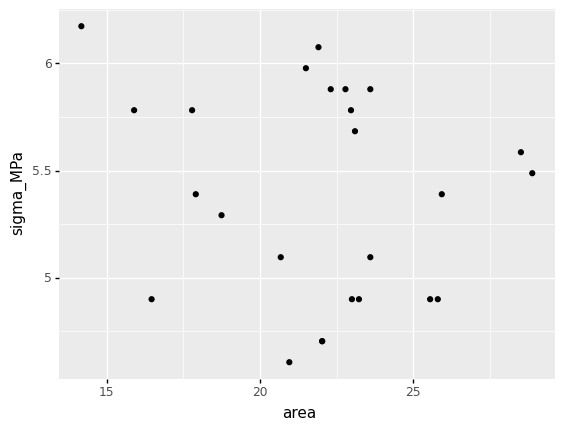

<ggplot: (8765563724713)>

In [39]:
## NOTE: No need to edit
(
    df_converted
    >> pt.ggplot(pt.aes("area", "sigma_MPa"))
    + pt.geom_point()
)

Part of the power of plotnine (over other graphing software) is that we can very easily tweak our graphs to show additional information. For instance, if we also wanted to see if the samples in the two blocks were at all different, we could easily color the points.

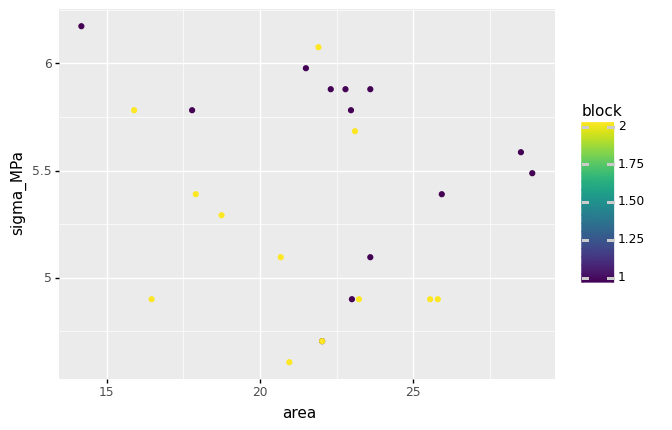

<ggplot: (8765563978737)>

In [41]:
## NOTE: No need to edit
(
    df_converted
    >> pt.ggplot(pt.aes("area", "sigma_MPa"))
#     + pt.geom_point() # Original
    + pt.geom_point(pt.aes(color="block")) # Modified for color
)

We'll learn more about plotnine and visualization in tomorrow's workshop exercises.
